# Homework 4

Please use the `File -> Download .ipynb` and submit through Canvas/Gradescope.

This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 3 folder on Google Drive](https://drive.google.com/drive/folders/1xxiRKjAW3hKotLn8s9LvWYprGxbdTfWJ?usp=drive_link).


In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
acs = pd.read_csv("/content/gdrive/MyDrive/Stats 206 Winter 2024/data/pums_short.csv.gz")


## Question 1: Working with missing data

### Q1.a

Repeat the calcuation from lab that computes the number of missing values for the `"RNTP"` column.

Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the table. What do you notice?



In [38]:
print(acs["VALP"].isna().sum())
print(acs["RNTP"].isna().sum())
print("Total number of rows =" , len(acs))
# Total number of rows < the sum of nan values VALPS and RNTP

97644
202728
Total number of rows = 276632


### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.

In [21]:
acs["VALP"].isna().sum() + acs["RNTP"].isna().sum() >= 276632 #Total number of rows

True

### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes housholds that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:


In [22]:
hint = pd.Series([True, False, False, True])
~ hint

0    False
1     True
2     True
3    False
dtype: bool

In [23]:
owners = acs.dropna(subset=['VALP'])
print(len(owners))
276632 - acs["VALP"].isna().sum() == len(owners)

178988


True

### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



In [24]:
print(owners["HINCP"].isnull().mean())
# THE FIRST VALUE I GOT WAS LIKE 0.13 something
owners["HINCP"].median()
owners["HINCP"].fillna(owners["HINCP"].median(), inplace = True)
print(owners["HINCP"].isnull().mean())

0.01331932867007844
0.0


### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.



In [25]:
renters = acs.dropna(subset = ["RNTP"])
renters["HINCP"].fillna(renters["HINCP"].median(), inplace = True)
print(owners["HINCP"].mean(), owners["HINCP"].median(), (owners["HINCP"].quantile(.75) - owners["HINCP"].quantile(.25)), owners["HINCP"].std())
print(renters["HINCP"].mean(), renters["HINCP"].median(), (renters["HINCP"].quantile(.75) - renters["HINCP"].quantile(.25)), renters["HINCP"].std())
print("The owners has a higher location of values (Mean household income) than renters.")
print("The owners also has more spread which means they have more variability.")
print("This sort of insinuates owners tend to have higher household incomes on average and a wider range of incomes compared to renters")

103101.59041946946 75000.0 85100.0 107811.39422510703
56607.35456808833 40000.0 49600.0 64594.46491847602
The owners has a higher location of values (Mean household income) than renters.
The owners also has more spread which means they have more variability.
This sort of insinuates owners tend to have higher household incomes on average and a wider range of incomes compared to renters


## Question 2: Income by age category

### Q2.a

Review the `"R65"` variable in the code book. It is composed of three categories: A) households with nobody of age 65 and over; B) households with (exactly) 1 person of age 65 and over; and C) households with 2 or more people of age 65 and over. Below is some code to make those categories more readable.

* Compute the proportion of the data set in each of the categories. What is the most common of these categories?
* Calculate the median household income for each state (`"ST"`), `"PUMA"`, and for each level of the `"R65_cat"` variable.
* Keep this result as a tall table but use `reset_index` to make it a little easier to work with. We will call this result `median_hh`. Show the dimensions of this table.

In [26]:
acs["R65_cat"] = acs["R65"].replace([0, 1, 2], ["65+: None", "65+: One", "65+: Two more"])

In [27]:
print(acs['R65_cat'].value_counts(normalize=True))
print("The most common is 65+: None")
median_hh = acs.groupby([ 'ST', 'PUMA', 'R65_cat'])['HINCP'].median().reset_index()
median_hh.shape

65+: None        0.652720
65+: One         0.217067
65+: Two more    0.130213
Name: R65_cat, dtype: float64
The most common is 65+: None


(7046, 4)

### Q2.b

Create a single plot that shows the **conditional distributions**  histogram of the within-PUMA median income for each level of `"R65_cat"` separately. (Creating combined plots like this is one advatage of *tall tables*.) Contrast these conditional distributions. Does one category stand out as having a different conditional distribution than the other two?

<Axes: xlabel='HINCP', ylabel='Count'>

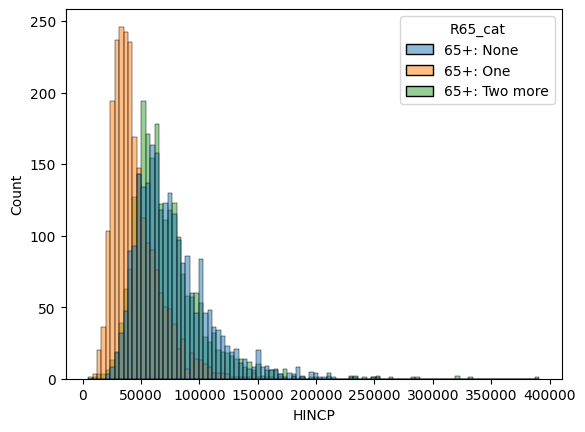

In [28]:
sb.histplot(data = median_hh, x = "HINCP", hue = "R65_cat")
#Both distributions are right skewed. They have similiar centers. 65+ two or more has some extreme values pulling the mean.

### Q2.c

Some questions are easier to answer using a wide table. If you have created the `median_hh` table as described in 2.a, uncomment the following to get a wide version of the table:

In [29]:
median_hh_wide = median_hh.pivot(index = ["ST", "PUMA"], columns = "R65_cat", values = "HINCP")
median_hh_wide.describe()

R65_cat,65+: None,65+: One,65+: Two more
count,2351.000000,2351.000000,2344.000000
mean,76653.735857,45615.000000,72485.023464
std,31353.239341,21038.316454,32410.418098
min,21000.000000,10800.000000,4800.000000
25%,55000.000000,31200.000000,52100.000000
50%,70000.000000,40100.000000,65000.000000
75%,91000.000000,54975.000000,84200.000000
max,251000.000000,187100.000000,391000.000000


Using this table (which has one row for each state-PUMA combination), compute the proportion of state-PUMAs that have each group as the highest median income. Explain what these results are showing; can you think of any reason why we see this set of results?

In [30]:
max_income_group = median_hh_wide.idxmax(axis=1)
proportion = max_income_group.value_counts(normalize=True)
print(proportion)


65+: None        0.572097
65+: Two more    0.396002
65+: One         0.031901
dtype: float64


## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

In [31]:
mean_distance = acs["HINCP"] - acs["HINCP"].mean()
median_distance = acs["HINCP"] - acs["HINCP"].median()
mean_distance = (mean_distance**2).sum()
median_distance = (median_distance**2).sum()
print("The sum of all the mean s is",  mean_distance)
print("The sum of all median distances is", median_distance)
mean_distance < median_distance

The sum of all the mean s is 2514930676893640.5
The sum of all median distances is 2693213854216370.0


True

### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

In [32]:
sum_of_absolutemean_distances = (acs["HINCP"] - acs["HINCP"].mean()).abs().sum()
sum_of_absolutemedian_distances = (acs["HINCP"] - acs["HINCP"].median()).abs().sum()
print("The sum of absolute distances using mean is",  sum_of_absolutemean_distances)
print("The sum of absolute distances using median is", sum_of_absolutemedian_distances)


The sum of absolute distances using mean is 15613409566.75057
The sum of absolute distances using median is 14508223606.0



While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?

For this particular data set, it looks like utilizing the median would minimize the sum of absolute differences as the sum of absolute distances using the mean is greater than the sum of absolute distances using the median
